/tmp/ipython-input-2-946511702.py:55: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


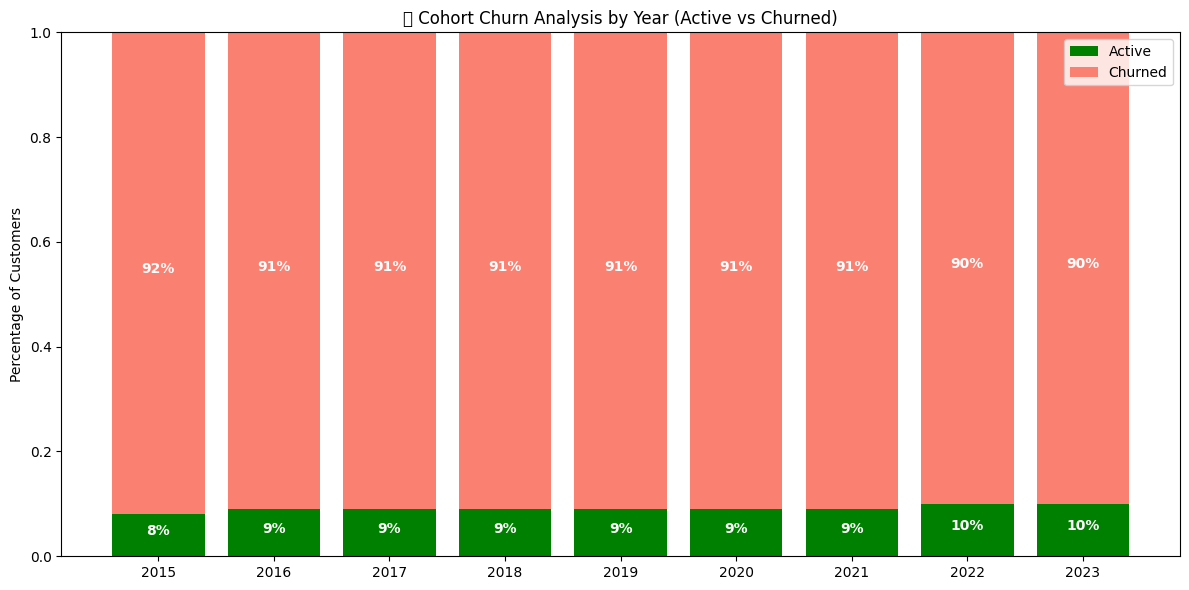

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = [
    {"cohort_year":2015,"customer_status":"Active","num_customers":237,"status_percentage":0.08},
    {"cohort_year":2015,"customer_status":"Churned","num_customers":2588,"status_percentage":0.92},
    {"cohort_year":2016,"customer_status":"Active","num_customers":311,"status_percentage":0.09},
    {"cohort_year":2016,"customer_status":"Churned","num_customers":3086,"status_percentage":0.91},
    {"cohort_year":2017,"customer_status":"Active","num_customers":385,"status_percentage":0.09},
    {"cohort_year":2017,"customer_status":"Churned","num_customers":3683,"status_percentage":0.91},
    {"cohort_year":2018,"customer_status":"Active","num_customers":704,"status_percentage":0.09},
    {"cohort_year":2018,"customer_status":"Churned","num_customers":6742,"status_percentage":0.91},
    {"cohort_year":2019,"customer_status":"Active","num_customers":687,"status_percentage":0.09},
    {"cohort_year":2019,"customer_status":"Churned","num_customers":7068,"status_percentage":0.91},
    {"cohort_year":2020,"customer_status":"Active","num_customers":283,"status_percentage":0.09},
    {"cohort_year":2020,"customer_status":"Churned","num_customers":2748,"status_percentage":0.91},
    {"cohort_year":2021,"customer_status":"Active","num_customers":442,"status_percentage":0.09},
    {"cohort_year":2021,"customer_status":"Churned","num_customers":4221,"status_percentage":0.91},
    {"cohort_year":2022,"customer_status":"Active","num_customers":937,"status_percentage":0.10},
    {"cohort_year":2022,"customer_status":"Churned","num_customers":8073,"status_percentage":0.90},
    {"cohort_year":2023,"customer_status":"Active","num_customers":455,"status_percentage":0.10},
    {"cohort_year":2023,"customer_status":"Churned","num_customers":4263,"status_percentage":0.90}
]

# Create DataFrame
df = pd.DataFrame(data)

# Pivot to have Active and Churned as columns
pivot_df = df.pivot(index="cohort_year", columns="customer_status", values="status_percentage").sort_index()

# Bar positions
years = pivot_df.index.astype(str)
active_pct = pivot_df["Active"]
churned_pct = pivot_df["Churned"]

# Plot
fig, ax = plt.subplots(figsize=(12,6))

# Stacked bars
bars1 = ax.bar(years, active_pct, label="Active", color="green")
bars2 = ax.bar(years, churned_pct, bottom=active_pct, label="Churned", color="salmon")

# Labels
ax.set_ylabel("Percentage of Customers")
ax.set_title("🛑 Cohort Churn Analysis by Year (Active vs Churned)")
ax.legend(loc="upper right")

# Add percentage labels
for i, (a, c) in enumerate(zip(active_pct, churned_pct)):
    ax.text(i, a/2, f"{a*100:.0f}%", ha="center", color="white", weight="bold")
    ax.text(i, a + c/2, f"{c*100:.0f}%", ha="center", color="white", weight="bold")

plt.ylim(0,1)
plt.tight_layout()
plt.show()
